In [1]:
import math
import numpy as np


#Array creation
N = 10
A = np.arange(N)
print(A)

[0 1 2 3 4 5 6 7 8 9]


In [2]:
A = A.reshape(5,2)
print(A)
print(f"A shape: {A.shape}")

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
A shape: (5, 2)


In [3]:
B = np.arange(2*N)
print(B)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [4]:
B = B.reshape(2,10)
print(B)
print(f"B shape: {B.shape}")

[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]]
B shape: (2, 10)


In [5]:
#Array operations
# Element-wise operations - these can only be applied to arrays that have the same shape 
# (or if their shapes can be "broadcast" together - more on this later)
A1 = np.arange(N).reshape(A.shape)
C = A + A1
print(C)

[[ 0  2]
 [ 4  6]
 [ 8 10]
 [12 14]
 [16 18]]


In [6]:
# Broadcasting - as long as an array's dimensions are compatible with their 
# counterparts in the other array, they can be "broadcasted" together. This means that numpy will 'strectch'
# the smaller dimension along its axis so that element-wise operations can be applied between them
A2 = np.arange(5).reshape(5,1)
print(A2, A2.shape)  

# A2 has shape (5, 1) so it can be broadcast to shape (5, 2) along A's horizontal axis
# it's as if A2 has been copied along the horizontal axis so that it can be added to A
D = A + A2
print(D, D.shape)

[[0]
 [1]
 [2]
 [3]
 [4]] (5, 1)
[[ 0  1]
 [ 3  4]
 [ 6  7]
 [ 9 10]
 [12 13]] (5, 2)


In [7]:
# Similarly, we can also broadcast an array of shape (1, 2) along A's vertical axis
A3 = np.arange(2).reshape(1,2)
print(A3, A3.shape)

E = A * A3
print(E, E.shape)


# In general, 2 arrays can be broadcast together if each dimension in one array is 
# compatible with its counterpart in the other array. Dimensions are compatible
# if they are equal or one of them is equal to 1. The dimension of size 1 is expanded 
# to fit the size of its counterpart[https://numpy.org/doc/stable/user/basics.broadcasting.html]

[[0 1]] (1, 2)
[[0 1]
 [0 3]
 [0 5]
 [0 7]
 [0 9]] (5, 2)


In [8]:
# Array products
# Contrary to the * operator, which performs element-wise multiplication between the arrays, np.dot and np.matmul are the dot and matrix products, respectively, of the arrays.

# The @ operator is always equivalent to np.matmul. When working with 2D arrays, np.matmul and np.dot are equivalent. We can show this:
F_1 = A @ B
F_2 = np.matmul(A, B)
F_3 = np.dot(A, B)
print(F_1)
print(f"F_1 shape: {F_1.shape}")
print(f"F_1, F_2 and F_3 are { '' if np.array_equal(F_1, F_2) and np.array_equal(F_2, F_3) else 'not' } equal!")

[[ 10  11  12  13  14  15  16  17  18  19]
 [ 30  35  40  45  50  55  60  65  70  75]
 [ 50  59  68  77  86  95 104 113 122 131]
 [ 70  83  96 109 122 135 148 161 174 187]
 [ 90 107 124 141 158 175 192 209 226 243]]
F_1 shape: (5, 10)
F_1, F_2 and F_3 are  equal!


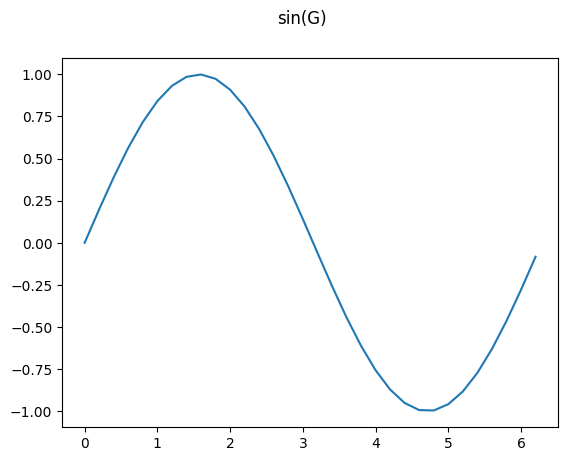

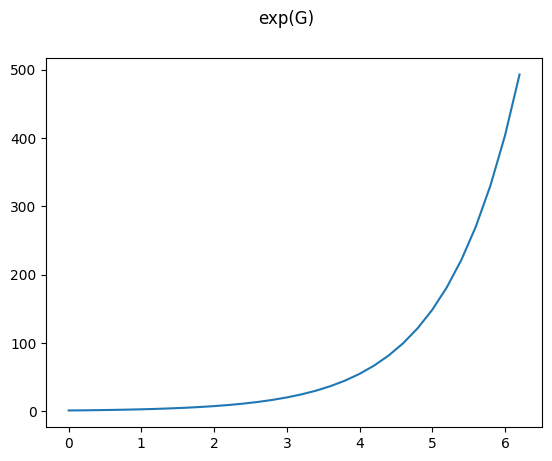

In [9]:
import matplotlib.pyplot as plt
# Applying functions to an array. Functions can be applied element-wise to each element in the array. Some functions can be applied to a whole dimension and reduce it to size 1

# Element-wise functions: common uses are applying trig functions to an array of values:
G = np.arange(0, 2*np.pi, 0.2)
H = np.sin(G)
plt.plot(G, H)
plt.suptitle("sin(G)")
plt.show()

H_1 = np.exp(G)
plt.plot(G, H_1)
plt.suptitle("exp(G)")
plt.show()


In [10]:
# Reduce functions: applied along the selected dimension, consumes all the elements and reduces the axis down to 1 element
# If no axis is specified, the function is applied to the whole array, and reduces it to a scalar
print(A)

I = A.max()
print(f"Maximum value in A: \n{I}")

I_2 = np.mean(A, axis=0, keepdims=True)  # keepdims is needed to preserve the original shape of the axis
print(f"Average of each column in A: \n{I_2}")

I_3 = A.min(axis=1, keepdims=True) 
print(f"Minimum value in each row in A: \n{I_3}")


[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
Maximum value in A: 
9
Average of each column in A: 
[[4. 5.]]
Minimum value in each row in A: 
[[0]
 [2]
 [4]
 [6]
 [8]]


In [11]:
# Putting everything together for a practical example

# Defining some helper functions
def plot_point(point):
    plt.rcParams["figure.figsize"] = [3.50, 3.50]
    plt.rcParams["figure.autolayout"] = True
    x = point[0]
    y = point[1]
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    plt.grid()
    ax.plot(x, y, marker="o", markersize=10, markeredgecolor="black", markerfacecolor="red")
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    plt.show()



# This function returns an np array that describes a 2d rotation 
# matrix [https://www1.udel.edu/biology/rosewc/kaap686/notes/matrices_rotations.pdf]. 
# These kinds of structures are often used in computer graphics to rotate and translate points in space
def get_rot_clockwise_matrix(angle):
    return np.array([
        [ math.cos(angle), math.sin(angle)],
        [-math.sin(angle), math.cos(angle)]
    ])

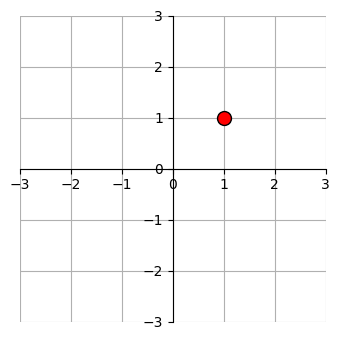

In [12]:
# Define a 2d point p to be a numpy array that holds the co-ordinates 1, 1
p = np.array([1, 1]).reshape(2, 1)
plot_point(p)

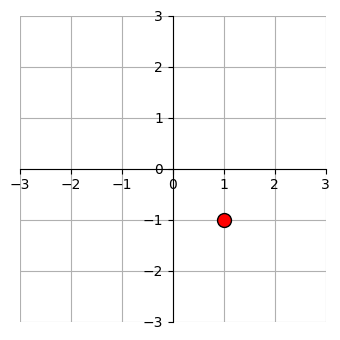

In [13]:
# Define a 90 angle: there are 360 degrees in 2pi radians, so we need to divide by 2 to get the equivalent of 90 degrees
angle = math.pi/2 

# Get the matrix (numpy array) for a clockwise 90 degree rotation
rot90 = get_rot_clockwise_matrix(angle)

# Perform the multiplication and plot!
p = rot90 @ p
plot_point(p)


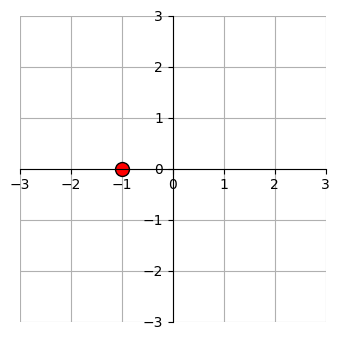

In [14]:
# Translate the position by some arbitrary amount

translation = np.array([[-2, 1]])
p = p + translation.T # transpose the array so it can be broadcast to the point array's shape

plot_point(p)

In [19]:
# Module imports and plot settings

import re
import pandas as pd


pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.mode.chained_assignment = None 
plt.rcParams["figure.figsize"] = [8, 7]
plt.rcParams["figure.autolayout"] = True


# Dataset courtesy of the Metropolitan Museum of Art in New York [https://github.com/metmuseum/openaccess]
MET_DATA_PATH = "./data/metmuseum/MetObjects.csv" 




In [20]:
# Taking a look at the dataset
dataset = pd.read_csv(MET_DATA_PATH)
dataset

# We can see that there are several problems with the dataset right off the bat:
# 1. First row seems to contain garbage: none of the column names match up with the data types, and many are NaN
# 2. It looks like many of the columns are completely empty - they add nothing to the dataset but clutter it
# 3. Too many columns! This depends on what your needs are, but we don't need all of them for this exercise
# 4. Inconsistent formatting in the Dimensions column - makes it difficult to use them downstream
# year datatype is float

/tmp/ipykernel_33262/4002299990.py:2: DtypeWarning: Columns (5,7,10,11,12,13,14,34,35,36,37,38,39,40,41,42,43,44,45,46) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv(MET_DATA_PATH)


,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Gallery Number,Department,AccessionYear,Object Name,Title,Culture,Period,Dynasty,Reign,Portfolio,Constituent ID,Artist Role,Artist Prefix,Artist Display Name,Artist Display Bio,Artist Suffix,Artist Alpha Sort,Artist Nationality,Artist Begin Date,Artist End Date,Artist Gender,Artist ULAN URL,Artist Wikidata URL,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Geography Type,City,State,County,Country,Region,Subregion,Locale,Locus,Excavation,River,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL
0,1979.486.1,False,False,False,1,NaN,The American Wing,1979.0,Coin,One-dollar Liberty Head Coin,NaN,NaN,NaN,NaN,NaN,16429,Maker,,James Barton Longacre,"American, Delaware County, Pennsylvania 1794–1...",,"Longacre, James Barton",American,1794,1869,NaN,http://vocab.getty.edu/page/ulan/500011409,https://www.wikidata.org/wiki/Q3806459,1853,1853,1853,Gold,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1979",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/1,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
1,1980.264.5,False,False,False,2,NaN,The American Wing,1980.0,Coin,Ten-dollar Liberty Head Coin,NaN,NaN,NaN,NaN,NaN,107,Maker,,Christian Gobrecht,1785–1844,,"Gobrecht, Christian",,1785,1844,NaN,http://vocab.getty.edu/page/ulan/500077295,https://www.wikidata.org/wiki/Q5109648,1901,1901,1901,Gold,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1980",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/2,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
2,67.265.9,False,False,False,3,NaN,The American Wing,1967.0,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love Jr., 1967",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/3,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
3,67.265.10,False,False,False,4,NaN,The American Wing,1967.0,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love Jr., 1967",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/4,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
4,67.265.11,False,False,False,5,NaN,The American Wing,1967.0,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love Jr., 1967",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/5,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477799,23.112.2893,False,False,True,860869,NaN,Drawings and Prints,1923,Drawing,Phaeton #24567,NaN,NaN,NaN,NaN,NaN,16517,Manufacturer,,Brewster & Co.,"American, New York",,Brewster & Co.,,,,NaN,NaN,NaN,1904,1904,1904,"Graphite on cardstock adhered to canvas, perfo...",Sheet: 13 1/2 × 22 1/2 in. (34.3 × 57.2 cm),"Gift of William Brewster, 1923",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Drawings,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",Carriages,http://vocab.getty.edu/page/aat/300185335,https://www.wikidata.org/wiki/Q235356
477800,23.112.2894,False,False,True,860870,NaN,Drawings and Prints,1923,Drawing,Stanhope Phaeton #25538-25539 (#21222),NaN,NaN,NaN,NaN,NaN,16517,Manufacturer,,Brewster & C

In [21]:
# Get rid of the first row, we can use dataframe slicing to accomplish this:
dataset = dataset.iloc[1:]
dataset


,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Gallery Number,Department,AccessionYear,Object Name,Title,Culture,Period,Dynasty,Reign,Portfolio,Constituent ID,Artist Role,Artist Prefix,Artist Display Name,Artist Display Bio,Artist Suffix,Artist Alpha Sort,Artist Nationality,Artist Begin Date,Artist End Date,Artist Gender,Artist ULAN URL,Artist Wikidata URL,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Geography Type,City,State,County,Country,Region,Subregion,Locale,Locus,Excavation,River,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL
1,1980.264.5,False,False,False,2,NaN,The American Wing,1980.0,Coin,Ten-dollar Liberty Head Coin,NaN,NaN,NaN,NaN,NaN,107,Maker,,Christian Gobrecht,1785–1844,,"Gobrecht, Christian",,1785,1844,NaN,http://vocab.getty.edu/page/ulan/500077295,https://www.wikidata.org/wiki/Q5109648,1901,1901,1901,Gold,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1980",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/2,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
2,67.265.9,False,False,False,3,NaN,The American Wing,1967.0,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love Jr., 1967",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/3,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
3,67.265.10,False,False,False,4,NaN,The American Wing,1967.0,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love Jr., 1967",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/4,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
4,67.265.11,False,False,False,5,NaN,The American Wing,1967.0,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love Jr., 1967",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/5,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
5,67.265.12,False,False,False,6,NaN,The American Wing,1967.0,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love Jr., 1967",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/6,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477799,23.112.2893,False,False,True,860869,NaN,Drawings and Prints,1923,Drawing,Phaeton #24567,NaN,NaN,NaN,NaN,NaN,16517,Manufacturer,,Brewster & Co.,"American, New York",,Brewster & Co.,,,,NaN,NaN,NaN,1904,1904,1904,"Graphite on cardstock adhered to canvas, perfo...",Sheet: 13 1/2 × 22 1/2 in. (34.3 × 57.2 cm),"Gift of William Brewster, 1923",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Drawings,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",Carriages,http://vocab.getty.edu/page/aat/300185335,https://www.wikidata.org/wiki/Q235356
477800,23.112.2894,False,False,True,860870,NaN,Drawings and Prints,1923,Drawing,Stanhope Phaeton #25538-25539 (#21222),NaN,NaN,NaN,NaN,NaN,16517,Manufacturer,,Brewster & Co.,"American, New York",,Brewster & Co.,,,,NaN,NaN,NaN,1904,1904,1904,Graphite and ink,Sheet: 13 in. × 22 1/4 in. (33 × 56.5 cm),"Gift of William Brewster, 1923",NaN,

In [22]:
# Get rid of all columns that are completely empty
dataset = dataset.dropna(how='all', axis=1) # how=all means drop this key if all items are NaN. Axis=1 means work on columns

# At this point, we can also drop the columns that are irrelevant to our needs
exclude_cols = [
    "Country",
    "Culture",
    "Is Highlight",
    "Is Timeline Work",
    "Object End Date",
    "Gallery Number",
    "Period",
    "Constituent ID",
    "Artist Role",
    "Artist Prefix",
    "Artist Display Name",
    "Artist Display Bio",
    "Artist Suffix",
    "Artist Alpha Sort",
    "Artist Gender",
    "Artist Nationality",
    "Artist ULAN URL",
    "Artist Wikidata URL",
    "Credit Line",
    "Object ID",
    "Geography Type",
    "City",
    "State",
    "County",
    "Region",
    "Classification",
    "Rights and Reproduction",
    "Link Resource",
    "Object Wikidata URL",
    "Repository",
    "Tags AAT URL",
    "Tags Wikidata URL",
    "Artist Begin Date",
    "Artist End Date",
    "Object Date",
]

dataset = dataset.drop(exclude_cols, axis=1) # again axis=1 means we work on the columns of this dataframe
dataset


,Object Number,Is Public Domain,Department,AccessionYear,Object Name,Title,Dynasty,Reign,Portfolio,Object Begin Date,Medium,Dimensions,Subregion,Locale,Locus,Excavation,River,Tags
1,1980.264.5,False,The American Wing,1980.0,Coin,Ten-dollar Liberty Head Coin,NaN,NaN,NaN,1901,Gold,Dimensions unavailable,NaN,NaN,NaN,NaN,NaN,NaN
2,67.265.9,False,The American Wing,1967.0,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,1909,Gold,Diam. 11/16 in. (1.7 cm),NaN,NaN,NaN,NaN,NaN,NaN
3,67.265.10,False,The American Wing,1967.0,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,1909,Gold,Diam. 11/16 in. (1.7 cm),NaN,NaN,NaN,NaN,NaN,NaN
4,67.265.11,False,The American Wing,1967.0,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,1909,Gold,Diam. 11/16 in. (1.7 cm),NaN,NaN,NaN,NaN,NaN,NaN
5,67.265.12,False,The American Wing,1967.0,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,1909,Gold,Diam. 11/16 in. (1.7 cm),NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477799,23.112.2893,True,Drawings and Prints,1923,Drawing,Phaeton #24567,NaN,NaN,NaN,1904,"Graphite on cardstock adhered to canvas, perfo...",Sheet: 13 1/2 × 22 1/2 in. (34.3 × 57.2 cm),NaN,NaN,NaN,NaN,NaN,Carriages
477800,23.112.2894,True,Drawings and Prints,1923,Drawing,Stanhope Phaeton #25538-25539 (#21222),NaN,NaN,NaN,1904,Graphite and ink,Sheet: 13 in. × 22 1/4 in. (33 × 56.5 cm),NaN,NaN,NaN,NaN,NaN,Carriages
477801,53.600.1434,False,Drawings and Prints,1953,Print,"Forest landscape with cattle drinking, a woman...",NaN,NaN,NaN,1768,Etching,Plate: 11 5/8 × 7 5/8 in. (29.6 × 19.4 cm),NaN,NaN,NaN,NaN,NaN,NaN
477802,23.112.2895,True,Drawings and Prints,1923,Drawing,Phaeton with folding top,NaN,NaN,NaN,1890,Graphite,Sheet: 13 in. × 22 1/4 in. (33 × 56.5 cm),NaN,NaN,NaN,NaN,NaN,Carriages


In [23]:
# Dropping records (rows) - we can also get rid of rows that do not meet certain criteria
# For example, given a subset of columns that we deem very important, we can drop all rows are NaN in any of these fields

important_cols = ['Tags', 'Dimensions', 'Object Begin Date', 'AccessionYear'] 
dataset = dataset.dropna(subset=important_cols)
dataset

# Note that doing this cut the size of our dataset in half! Compare the number of rows in the previous cell to this one.

,Object Number,Is Public Domain,Department,AccessionYear,Object Name,Title,Dynasty,Reign,Portfolio,Object Begin Date,Medium,Dimensions,Subregion,Locale,Locus,Excavation,River,Tags
6,67.265.13,False,The American Wing,1967.0,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,1909,Gold,Diam. 11/16 in. (1.7 cm),NaN,NaN,NaN,NaN,NaN,Birds|Coins
7,67.265.14,False,The American Wing,1967.0,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,1909,Gold,Diam. 11/16 in. (1.7 cm),NaN,NaN,NaN,NaN,NaN,Eagles|Men|Profiles
32,64.62,False,The American Wing,1964.0,Bust,Bust of Abraham Lincoln,NaN,NaN,NaN,1876,Pressed glass,2 3/4 x 3 1/2 x 2 3/4 in. (7 x 8.9 x 7 cm),NaN,NaN,NaN,NaN,NaN,Men|Abraham Lincoln|Portraits
33,1970.289.6,True,The American Wing,1970.0,Clock,Acorn Clock,NaN,NaN,NaN,1847,"Mahogany, laminated",24 3/8 x 14 5/8 x 5 1/8 in. (61.9 x 37.1 x 13 cm),NaN,NaN,NaN,NaN,NaN,Landscapes|Boats
34,04.1a–c,False,The American Wing,1904.0,Vase,The Adams Vase,NaN,NaN,NaN,1893,"Gold, amethysts, spessartites, tourmalines, fr...",Overall: 19 7/16 x 13 x 9 1/4 in. (49.4 x 33 x...,NaN,NaN,NaN,NaN,NaN,Animals|Garlands|Birds|Men
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477796,23.112.2892,True,Drawings and Prints,1923,Drawing,Stanhope Phaeton #23533,NaN,NaN,NaN,1897,"Graphite on cardstock adhered to canvas, perfo...",Sheet: 13 3/8 × 22 1/4 in. (34 × 56.5 cm),NaN,NaN,NaN,NaN,NaN,Carriages
477799,23.112.2893,True,Drawings and Prints,1923,Drawing,Phaeton #24567,NaN,NaN,NaN,1904,"Graphite on cardstock adhered to canvas, perfo...",Sheet: 13 1/2 × 22 1/2 in. (34.3 × 57.2 cm),NaN,NaN,NaN,NaN,NaN,Carriages
477800,23.112.2894,True,Drawings and Prints,1923,Drawing,Stanhope Phaeton #25538-25539 (#21222),NaN,NaN,NaN,1904,Graphite and ink,Sheet: 13 in. × 22 1/4 in. (33 × 56.5 cm),NaN,NaN,NaN,NaN,NaN,Carriages
477802,23.112.2895,True,Drawings and Prints,1923,Drawing,Phaeton with folding top,NaN,NaN,NaN,1890,Graphite,Sheet: 13 in. × 22 1/4 in. (33 × 56.5 cm),NaN,NaN,NaN,NaN,NaN,Carriages


In [24]:
# Cleaning up the Dimensions field - we need it to have consistent formatting so that any functions we write 
# later can work with the values without any complicated processing. Doing the complicated work up front 
# saves a lot of time down the line!

def extract_dimensions(dim_str):
    # Don't worry too much about how exactly this function extracts the dimensions
    # this is just to show that we can write arbitrarily complex cleaning functions
    # and apply it to a Dataframe's columns.
    dimensions_exp = r"(?<=\()( *\d.+?)(?=cm\))"
    delimiter_exp = r"(?:\d+\.?\d* *)([^\.\n])(?: *\d+\.?\d* *)?(?:[^\.\n] *\d+\.?\d*)?"
    try:
        dim_str = dim_str.split("\n")[0]
        dimensions = re.search(dimensions_exp, dim_str).group(0)
        delimiter = re.search(delimiter_exp, dimensions.strip()).groups()[0]
        if not delimiter.isnumeric():
            # There are multiple dimensions
            retval = ','.join(dimensions.split(delimiter))
        else:
            retval = dimensions
    except AttributeError as e:
        retval = np.nan
    finally:
        return retval

In [25]:
# Standardise the dimensions of the pieces - now this column will only have values that look like:
#    1. a OR
#    2. a, b OR
#    3. a, b, c
#    where a, b and c are lengths in centimetres

dataset['Dimensions'] = dataset['Dimensions'].apply(extract_dimensions) # using the extract_dimensions function we defined earlier

# Because extract_dimensions can fail and return NaN, we also need to remove any records where Dimensions is NaN
dataset = dataset.dropna(subset=important_cols)
dataset

,Object Number,Is Public Domain,Department,AccessionYear,Object Name,Title,Dynasty,Reign,Portfolio,Object Begin Date,Medium,Dimensions,Subregion,Locale,Locus,Excavation,River,Tags
6,67.265.13,False,The American Wing,1967.0,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,1909,Gold,1.7,NaN,NaN,NaN,NaN,NaN,Birds|Coins
7,67.265.14,False,The American Wing,1967.0,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,1909,Gold,1.7,NaN,NaN,NaN,NaN,NaN,Eagles|Men|Profiles
32,64.62,False,The American Wing,1964.0,Bust,Bust of Abraham Lincoln,NaN,NaN,NaN,1876,Pressed glass,"7 , 8.9 , 7",NaN,NaN,NaN,NaN,NaN,Men|Abraham Lincoln|Portraits
33,1970.289.6,True,The American Wing,1970.0,Clock,Acorn Clock,NaN,NaN,NaN,1847,"Mahogany, laminated","61.9 , 37.1 , 13",NaN,NaN,NaN,NaN,NaN,Landscapes|Boats
34,04.1a–c,False,The American Wing,1904.0,Vase,The Adams Vase,NaN,NaN,NaN,1893,"Gold, amethysts, spessartites, tourmalines, fr...","49.4 , 33 , 23.5",NaN,NaN,NaN,NaN,NaN,Animals|Garlands|Birds|Men
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477796,23.112.2892,True,Drawings and Prints,1923,Drawing,Stanhope Phaeton #23533,NaN,NaN,NaN,1897,"Graphite on cardstock adhered to canvas, perfo...","34 , 56.5",NaN,NaN,NaN,NaN,NaN,Carriages
477799,23.112.2893,True,Drawings and Prints,1923,Drawing,Phaeton #24567,NaN,NaN,NaN,1904,"Graphite on cardstock adhered to canvas, perfo...","34.3 , 57.2",NaN,NaN,NaN,NaN,NaN,Carriages
477800,23.112.2894,True,Drawings and Prints,1923,Drawing,Stanhope Phaeton #25538-25539 (#21222),NaN,NaN,NaN,1904,Graphite and ink,"33 , 56.5",NaN,NaN,NaN,NaN,NaN,Carriages
477802,23.112.2895,True,Drawings and Prints,1923,Drawing,Phaeton with folding top,NaN,NaN,NaN,1890,Graphite,"33 , 56.5",NaN,NaN,NaN,NaN,NaN,Carriages


In [26]:
# Setting default values. Another way to deal with missing data is to asssign it a default value.
# For example, artists are known to occasionally not title their work (why??). Unfortunately, this dataset does not 
# handle this very gracefully. Fortunately, there is a quick fix

dataset['Title'].fillna('Untitled', inplace=True) # This replaces any instance of NaN in the Title column with Untitled

# We change some data types that don't really make sense: AccessionYear and Object Begin Date were originally
# loaded in with mixed datatypes (some are strings, some are numbers), which makes it difficult to sort correctly.
dataset = dataset.astype({'AccessionYear': 'int', 'Object Begin Date': 'int'})

# Finally, we can sort a dataframe based on the values in a specific column
dataset = dataset.sort_values('AccessionYear')


dataset

# We can now begin to ask some interesting questions about this dataset:
# Q1 Which department houses the oldest artwork in the museum?
# Q2 What is the proportion of artworks from each department?
# Q3 What is the average size (in cm^2) of Paintings in the Asian wing?
# Q4 How many artworks were delivered to the museum each decade, and what department took them?

,Object Number,Is Public Domain,Department,AccessionYear,Object Name,Title,Dynasty,Reign,Portfolio,Object Begin Date,Medium,Dimensions,Subregion,Locale,Locus,Excavation,River,Tags
138941,70.1,True,Greek and Roman Art,1870,"Sarcophagus, garland",Marble sarcophagus with garlands,NaN,NaN,NaN,200,"Marble, Proconnesian","134.6 , 223.5",NaN,NaN,NaN,NaN,NaN,Animals|Garlands|Hunting|Medusa
296150,71.36,True,European Paintings,1871,Painting,"Jacob Willemsz van Veen (1456–1535), the Artis...",NaN,NaN,NaN,1532,Oil on wood,"52.1 , 34.9",NaN,NaN,NaN,NaN,NaN,Men|Portraits
296522,71.96,True,European Paintings,1871,Painting,A Cavalry Engagement,NaN,NaN,NaN,1652,Oil on wood,"21.9 , 31.8",NaN,NaN,NaN,NaN,NaN,Men|Horse Riding|Landscapes
296618,71.160,True,European Paintings,1871,Painting,The Newborn Baby,NaN,NaN,NaN,1675,Oil on canvas,"64.1 , 80",NaN,NaN,NaN,NaN,NaN,Bedrooms|Children|Infants|Women
296628,71.50,True,European Paintings,1871,Painting,Interior of a Gothic Church at Night,NaN,NaN,NaN,1655,Oil on wood,"25.4 , 19.7",NaN,NaN,NaN,NaN,NaN,Arches|Interiors|Churches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475692,2021.130,True,Asian Art,2021,Figure,Untitled,NaN,NaN,NaN,1700,"Clay with polychrome, cold gold, and gilding",21,NaN,NaN,NaN,NaN,NaN,Men|Portraits
206852,2021.27,True,Drawings and Prints,2021,Drawing,"The Apse of Notre-Dame, Paris",NaN,NaN,NaN,1847,Graphite,"16.5 , 30.0",NaN,NaN,NaN,NaN,NaN,Cathedrals|Paris
439719,2021.16.19,True,Drawings and Prints,2021,Drawing,"Sir Launcelot and Elouise the Fair, for ""The S...",NaN,NaN,NaN,1905,Pen and ink,"46 , 28.1",NaN,NaN,NaN,NaN,NaN,Men|Horses|Women
439725,2021.16.24,False,Drawings and Prints,2021,Drawing,"“In a Position to Know,” Cover Design for ""Lif...",NaN,NaN,NaN,1922,Gouache,"49.3 , 43",NaN,NaN,NaN,NaN,NaN,Servants


In [27]:
# Let's tackle Q3:  What is the average size (in cm^2) of Paintings in the Asian wing?
# We can select the pieces that belong to the Asian Art department that are paintings:
asian_paintings = dataset.loc[(dataset['Department'] == 'Asian Art') & (dataset['Object Name'] == 'Painting')]
asian_paintings

,Object Number,Is Public Domain,Department,AccessionYear,Object Name,Title,Dynasty,Reign,Portfolio,Object Begin Date,Medium,Dimensions,Subregion,Locale,Locus,Excavation,River,Tags
42111,08.148.1–.3,True,Asian Art,1908,Painting,"月に兎・牡丹・立葵図|Rabbits under the Moon, Peonies, an...",NaN,NaN,NaN,1800,Set of three matted paintings; ink and color o...,"100.2 , 36",NaN,NaN,NaN,NaN,NaN,Flowers
34415,08.148.9,True,Asian Art,1908,Painting,Untitled,NaN,NaN,NaN,1797,Matted painting; ink and color on silk,"20.9 , 31",NaN,NaN,NaN,NaN,NaN,Landscapes|Mountains
34414,08.148.8,True,Asian Art,1908,Painting,Untitled,NaN,NaN,NaN,1797,Matted painting; ink and color on silk,"21.0 , 30.9",NaN,NaN,NaN,NaN,NaN,Boats
34413,08.148.7,True,Asian Art,1908,Painting,Untitled,NaN,NaN,NaN,1797,Matted painting; ink and color on silk,"35.4 , 54.4",NaN,NaN,NaN,NaN,NaN,Boats
34412,08.148.6,True,Asian Art,1908,Painting,Untitled,NaN,NaN,NaN,1797,Matted painting; ink and color on silk,"35.4 , 54.4",NaN,NaN,NaN,NaN,NaN,Mountains|Landscapes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407365,2016.754.2,False,Asian Art,2016,Painting,Untitled,NaN,NaN,NaN,1977,Watercolor on paper,"45.1 , 37.8",NaN,NaN,NaN,NaN,NaN,Men|Lovers|Women
408309,2016.754.4,False,Asian Art,2016,Painting,Untitled,NaN,NaN,NaN,1979,Watercolor on paper,"50.8 , 70.8",NaN,NaN,NaN,NaN,NaN,Fruit|Women|Working
415055,2016.490,False,Asian Art,2016,Painting,當代 鄭重賓 拓展地带|Unfolding Landscape,NaN,NaN,NaN,2015,Ink and acrylic on xuan paper mounted to alumi...,"156.5 , 265.4 , 4.4",NaN,NaN,NaN,NaN,NaN,Landscapes
445130,2017.447,True,Asian Art,2017,Painting,Untitled,NaN,NaN,NaN,1760,"Opaque watercolor, gold and silver on paper","50.3 , 34.4",NaN,NaN,NaN,NaN,NaN,Dresses|Profiles|Women


In [34]:
# We can apply a simple area calculation function to each item in the Dimensions column

def calc_area(dim_string):
    # Note that some paintings are listed as having only 1 dimension - here we can assume that they are 
    # circular and that the given dimension is its diameter (and probably not radius as that cannot be measured as easily)
    dims = dim_string.split(',') # extract dimensions from the string and place them into a list
    if len(dims) == 1:
        # We have a circular painting, apply the circular area formula
        diameter = float(dims[0])  # dimensions are strings, so need to be converted to floats
        radius = diameter/2        
        return math.pi * radius * radius
    elif len(dims) >= 2:
        # We have a rectangular painting, use the rectangular area formula
        # Some paintings probably have a 3rd dimension to indicate the depth
        # of its frame, we can ignore this and only take the first 2 elements
        width, height  = float(dims[0]), float(dims[1]) 
        return width * height

asian_paintings['Area']  = asian_paintings['Dimensions'].apply(calc_area)
asian_paintings

,Object Number,Is Public Domain,Department,AccessionYear,Object Name,Title,Dynasty,Reign,Portfolio,Object Begin Date,Medium,Dimensions,Subregion,Locale,Locus,Excavation,River,Tags,Area
42111,08.148.1–.3,True,Asian Art,1908,Painting,"月に兎・牡丹・立葵図|Rabbits under the Moon, Peonies, an...",NaN,NaN,NaN,1800,Set of three matted paintings; ink and color o...,"100.2 , 36",NaN,NaN,NaN,NaN,NaN,Flowers,3607.20
34415,08.148.9,True,Asian Art,1908,Painting,Untitled,NaN,NaN,NaN,1797,Matted painting; ink and color on silk,"20.9 , 31",NaN,NaN,NaN,NaN,NaN,Landscapes|Mountains,647.90
34414,08.148.8,True,Asian Art,1908,Painting,Untitled,NaN,NaN,NaN,1797,Matted painting; ink and color on silk,"21.0 , 30.9",NaN,NaN,NaN,NaN,NaN,Boats,648.90
34413,08.148.7,True,Asian Art,1908,Painting,Untitled,NaN,NaN,NaN,1797,Matted painting; ink and color on silk,"35.4 , 54.4",NaN,NaN,NaN,NaN,NaN,Boats,1925.76
34412,08.148.6,True,Asian Art,1908,Painting,Untitled,NaN,NaN,NaN,1797,Matted painting; ink and color on silk,"35.4 , 54.4",NaN,NaN,NaN,NaN,NaN,Mountains|Landscapes,1925.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407365,2016.754.2,False,Asian Art,2016,Painting,Untitled,NaN,NaN,NaN,1977,Watercolor on paper,"45.1 , 37.8",NaN,NaN,NaN,NaN,NaN,Men|Lovers|Women,1704.78
408309,2016.754.4,False,Asian Art,2016,Painting,Untitled,NaN,NaN,NaN,1979,Watercolor on paper,"50.8 , 70.8",NaN,NaN,NaN,NaN,NaN,Fruit|Women|Working,3596.64
415055,2016.490,False,Asian Art,2016,Painting,當代 鄭重賓 拓展地带|Unfolding Landscape,NaN,NaN,NaN,2015,Ink and acrylic on xuan paper mounted to alumi...,"156.5 , 265.4 , 4.4",NaN,NaN,NaN,NaN,NaN,Landscapes,41535.10
445130,2017.447,True,Asian Art,2017,Painting,Untitled,NaN,NaN,NaN,1760,"Opaque watercolor, gold and silver on paper","50.3 , 34.4",NaN,NaN,NaN,NaN,NaN,Dresses|Profiles|Women,1730.32


In [35]:
# We now have an Area column that we can reduce to find the average of the paintings in the Asian Art department:

average_area = asian_paintings['Area'].mean()
average_area

2133.9229626168385

In [36]:
# Just displaying the cleaned dataset, so we have a visual reference for the next problem
dataset

,Object Number,Is Public Domain,Department,AccessionYear,Object Name,Title,Dynasty,Reign,Portfolio,Object Begin Date,Medium,Dimensions,Subregion,Locale,Locus,Excavation,River,Tags
138941,70.1,True,Greek and Roman Art,1870,"Sarcophagus, garland",Marble sarcophagus with garlands,NaN,NaN,NaN,200,"Marble, Proconnesian","134.6 , 223.5",NaN,NaN,NaN,NaN,NaN,Animals|Garlands|Hunting|Medusa
296150,71.36,True,European Paintings,1871,Painting,"Jacob Willemsz van Veen (1456–1535), the Artis...",NaN,NaN,NaN,1532,Oil on wood,"52.1 , 34.9",NaN,NaN,NaN,NaN,NaN,Men|Portraits
296522,71.96,True,European Paintings,1871,Painting,A Cavalry Engagement,NaN,NaN,NaN,1652,Oil on wood,"21.9 , 31.8",NaN,NaN,NaN,NaN,NaN,Men|Horse Riding|Landscapes
296618,71.160,True,European Paintings,1871,Painting,The Newborn Baby,NaN,NaN,NaN,1675,Oil on canvas,"64.1 , 80",NaN,NaN,NaN,NaN,NaN,Bedrooms|Children|Infants|Women
296628,71.50,True,European Paintings,1871,Painting,Interior of a Gothic Church at Night,NaN,NaN,NaN,1655,Oil on wood,"25.4 , 19.7",NaN,NaN,NaN,NaN,NaN,Arches|Interiors|Churches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475692,2021.130,True,Asian Art,2021,Figure,Untitled,NaN,NaN,NaN,1700,"Clay with polychrome, cold gold, and gilding",21,NaN,NaN,NaN,NaN,NaN,Men|Portraits
206852,2021.27,True,Drawings and Prints,2021,Drawing,"The Apse of Notre-Dame, Paris",NaN,NaN,NaN,1847,Graphite,"16.5 , 30.0",NaN,NaN,NaN,NaN,NaN,Cathedrals|Paris
439719,2021.16.19,True,Drawings and Prints,2021,Drawing,"Sir Launcelot and Elouise the Fair, for ""The S...",NaN,NaN,NaN,1905,Pen and ink,"46 , 28.1",NaN,NaN,NaN,NaN,NaN,Men|Horses|Women
439725,2021.16.24,False,Drawings and Prints,2021,Drawing,"“In a Position to Know,” Cover Design for ""Lif...",NaN,NaN,NaN,1922,Gouache,"49.3 , 43",NaN,NaN,NaN,NaN,NaN,Servants


In [37]:
# Let's have a look the last question: How many artworks were delivered to the museum each decade, and what department took them?

# We want to group our findings by decade, so let's create an array of all the decades from when the museum started accepting pieces, to when the dataset was released.
# We've already sorted the dataframe by Accession year, so this should be easy - just look at the top (1872) and bottom (2021) record
d = 10
start = 1870
end = 2021
decades = np.arange(start,  end + d, d)
print(decades)



[1870 1880 1890 1900 1910 1920 1930 1940 1950 1960 1970 1980 1990 2000
 2010 2020 2030]


In [38]:
# Define a helper function that returns a dataframe for every decade in our list, along with a label for each one

def group_by_year(dataframe, years):
    subsets = []
    labels = []
    year_idx = 0
    while year_idx < len(years) - 1:
        start_year = years[year_idx]
        end_year = years[year_idx + 1]
        mask = (dataframe['AccessionYear'] > start_year) & (dataframe['AccessionYear'] <= end_year)
        label = f"{start_year} - {end_year}"
        subsets.append(dataframe.loc[mask])
        labels.append(label)
        year_idx += 1
    return subsets, labels
        

    


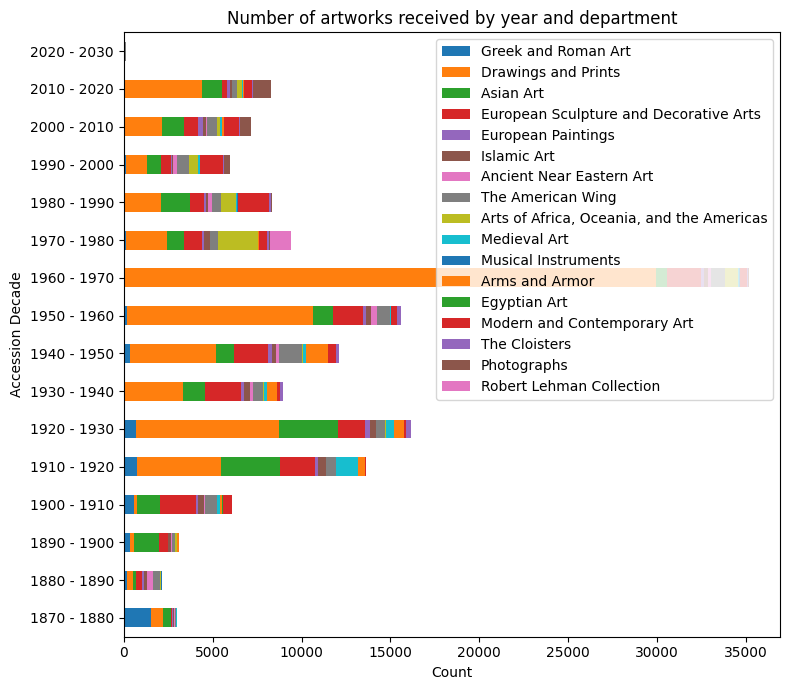

In [39]:
grouped_datasets, labels = group_by_year(dataset, decades)

combined = pd.concat([d['Department'].value_counts() for d in grouped_datasets], axis=1, keys=labels)
combined = combined.fillna(0)
combined = combined.astype('int')
combined = combined.transpose()


fig = plt.figure()
plt.title("Number of artworks received by year and department")
combined.plot.barh(stacked=True,
                   ax=fig.gca())
plt.legend()
plt.xlabel("Count")
plt.ylabel("Accession Decade")
plt.show()

# When data is cleaned up and presented in this way, it offers insights into the dataset that can uncover interesting 
# facts about it that we might not have necessarily set out to find. For instance, note the sudden increase in
# Arms and Armor pieces during the 1940s. Wonder where they came from...